In [4]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

Download cities

In [7]:
download_data_api("Kraków")
download_data("Cracow")
download_data("Brno")
download_data("Gliwice")

"The file is already downloaded"

In [8]:
df_kraków = get_POI("Kraków.osm",nothing,"Kraków.csv")
df_cracow = get_POI("Cracow.osm",nothing,"Cracow.csv")
df_brno = get_POI("Brno.osm",nothing,"Brno.csv")
df_gliwice = get_POI("Gliwice.osm",nothing,"Gliwice.csv")

Row,elemtype,elemid,nodeid,lat,lon,key,value,group,influence,range
,Symbol,Int64,Int64,Float64,Float64,String,String,Symbol,Float64,Float64
1,node,9187086,9187086,50.0322,15.6135,public_transport,stop_position,transport,5.0,300.0
2,node,21040270,21040270,48.1528,11.5372,public_transport,stop_position,transport,5.0,300.0
3,node,21040295,21040295,48.1468,11.5366,public_transport,stop_position,transport,5.0,300.0
4,node,21104924,21104924,48.4427,10.0171,public_transport,stop_position,transport,5.0,300.0
5,node,21308454,21308454,49.1875,16.6188,public_transport,stop_position,transport,5.0,300.0
6,node,21381077,21381077,49.5656,17.7416,public_transport,stop_position,transport,5.0,300.0
7,node,21410825,21410825,49.6423,17.939,public_transport,stop_position,transport,5.0,300.0
8,node,21410841,21410841,49.7075,18.0665,public_transport,stop_position,transport,5.0,300.0
9,node,21626790,21626790,49.1781,16.6038,public_transport,stop_position,transport,5.0,300.0


In [105]:
center_kraków = LLA(50.061692315544654, 19.939496620660737)
center_cracow = LLA(50.061692315544654, 19.939496620660737)
center_brno = LLA(49.196664523003115, 16.60804112914713)
center_gliwice = LLA(50.29388096424714, 18.66566269980933)
ix_kraków = AttractivenessSpatIndex(df_kraków,get_range=a->500)
ix_cracow = AttractivenessSpatIndex(df_cracow,get_range=a->500)
ix_brno = AttractivenessSpatIndex(df_brno,get_range=a->500)
ix_gliwice = AttractivenessSpatIndex(df_gliwice,get_range=a->500)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
15418 element(s) in 3 level(s) (1, 2, 198 node(s) per level):
 level=3 nchildren=2 mbr=((-14574.652868524954, -14407.06606756934), (9943.08734542987, 13292.328684984983)), 15418×10 DataFrame
   Row │ elemtype  elemid     nodeid       lat      lon      key               ⋯
       │ Symbol    Int64      Int64        Float64  Float64  String            ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node       28898012     28898012  50.2874  18.6641  public_transport  ⋯
     2 │ node       29017182     29017182  50.2881  18.6603  public_transport
     3 │ node       29092672     29092

In [106]:
points_kraków = generate_sectors(200,50,center_kraków,200)
points_cracow = generate_sectors(200,50,center_cracow,360)
points_brno = generate_sectors(200,50,center_brno,360)
points_gliwice = generate_sectors(200,50,center_gliwice,360)

200×360 Matrix{LLA}:
 LLA(50.2939, 18.6664, 0.000195594)  …  LLA(50.2939, 18.6664, 0.000195595)
 LLA(50.2939, 18.6671, 0.000782374)     LLA(50.2939, 18.6671, 0.000782373)
 LLA(50.2939, 18.6678, 0.00176034)      LLA(50.2939, 18.6678, 0.00176034)
 LLA(50.2939, 18.6685, 0.0031295)       LLA(50.2939, 18.6685, 0.00312949)
 LLA(50.2939, 18.6692, 0.00488984)      LLA(50.2939, 18.6692, 0.00488983)
 LLA(50.2939, 18.6699, 0.00704137)   …  LLA(50.2939, 18.6699, 0.00704136)
 LLA(50.2939, 18.6706, 0.00958408)      LLA(50.2939, 18.6706, 0.00958407)
 LLA(50.2939, 18.6713, 0.012518)        LLA(50.2939, 18.6713, 0.012518)
 LLA(50.294, 18.672, 0.0158431)         LLA(50.2939, 18.672, 0.0158431)
 LLA(50.294, 18.6727, 0.0195594)        LLA(50.2939, 18.6727, 0.0195593)
 ⋮                                   ⋱  
 LLA(50.2953, 18.8004, 7.21035)         LLA(50.2938, 18.8004, 7.21035)
 LLA(50.2953, 18.8011, 7.28566)         LLA(50.2938, 18.8011, 7.28565)
 LLA(50.2953, 18.8018, 7.36135)         LLA(50.2938, 18.801

In [107]:
attr = :shopping
attr_kraków = calculate_attractiveness_of_sector(points_kraków,ix_kraków,attr)
attr_cracow = calculate_attractiveness_of_sector(points_cracow,ix_cracow,attr)
attr_brno = calculate_attractiveness_of_sector(points_brno,ix_brno,attr)
attr_gliwice = calculate_attractiveness_of_sector(points_gliwice,ix_gliwice,attr)

200-element Vector{Float64}:
 621.6058106878343
 602.7539892411183
 568.8661481652342
 523.818496622592
 472.91818672249985
 418.8158260316735
 363.0604973169608
 309.66033266037334
 262.2551896944647
 222.57783936264056
   ⋮
   1.319060922187328
   1.2690717482352387
   1.1953661976779004
   1.1126127032442632
   0.9930184381766001
   0.8877541208838214
   0.7721625103331162
   0.6745857978009575
   0.5850248257824163

In [108]:
stand_kraków = min_max_scaling(attr_kraków)
stand_cracow = min_max_scaling(attr_cracow)
stand_brno = min_max_scaling(attr_brno)
stand_gliwice = min_max_scaling(attr_gliwice)

200-element Vector{Float64}:
 1.0
 0.9696438156726955
 0.9150758497569594
 0.8425377760431937
 0.7605754471503913
 0.6734570093742293
 0.5836768764317907
 0.4976891512665829
 0.4213549221310725
 0.35746438700711974
 ⋮
 0.0011819831366610071
 0.0011014879663058018
 0.000982803451656222
 0.0008495494667372384
 0.0006569725549972362
 0.0004874704711874986
 0.0003013388421305902
 0.00014421573972635995
 0.0

In [98]:
x_axis = [i*50 for i in 1:200]./1000

200-element Vector{Float64}:
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  ⋮
  9.6
  9.65
  9.7
  9.75
  9.8
  9.85
  9.9
  9.95
 10.0

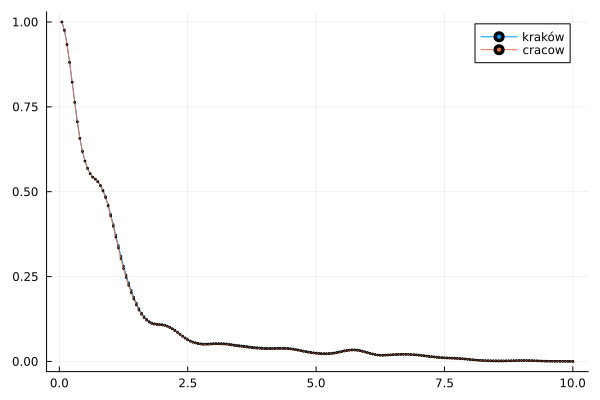

In [112]:
plotconfig = (marker=:circle, markersize=1)
cities = [stand_kraków,stand_cracow, stand_brno,stand_gliwice]
labels = ["kraków" "cracow" "brno" "gliwice"]
plot(x_axis,cities, labels = labels; plotconfig...)